<a href="https://colab.research.google.com/github/nurlailyfau/nurlailyfau.github.io/blob/main/HandsOn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlb
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df2021 = pd.read_csv("world-happiness-report-2021.csv")
df2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


# **1. Comparison**

## Barplot

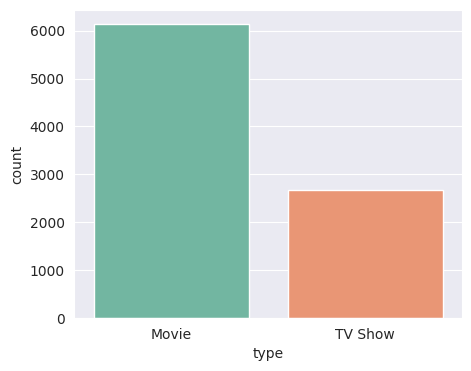

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (5,4))
sns.countplot(x = 'type', data = df, palette = 'Set2')
plt.show()

In [ ]:
df.groupby("type")[['show_id']].count()

,show_id
type,
Movie,6131
TV Show,2676


In [ ]:
df2021[['Country name', 'Explained by: Log GDP per capita']].sort_values('Explained by: Log GDP per capita', ascending = False).sample(10)

,Country name,Explained by: Log GDP per capita
61,South Korea,1.403
136,Zambia,0.528
69,Mongolia,0.966
22,Malta,1.411
11,Israel,1.376
118,Uganda,0.364
113,Cambodia,0.603
85,Armenia,0.996
73,North Cyprus,1.377
89,Azerbaijan,1.025


In [ ]:
df_gdp = df2021[['Country name', 'Explained by: Log GDP per capita']].sort_values('Explained by: Log GDP per capita', ascending = False).sample(10)

<Axes: xlabel='Explained by: Log GDP per capita', ylabel='Country name'>

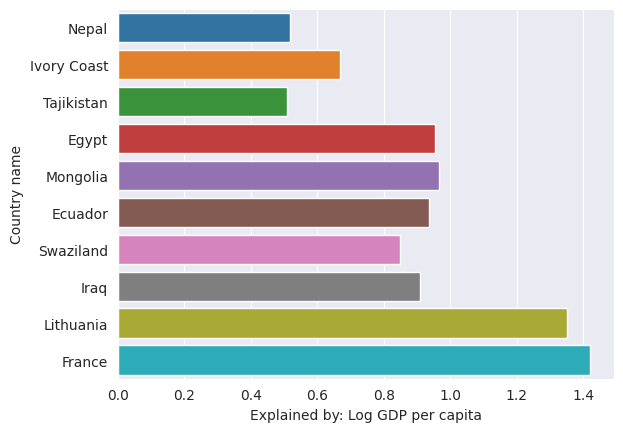

In [ ]:
sns.barplot(y = 'Country name', x = 'Explained by: Log GDP per capita', data = df_gdp)

## Barplot Top 10

<Axes: xlabel='rating', ylabel='count'>

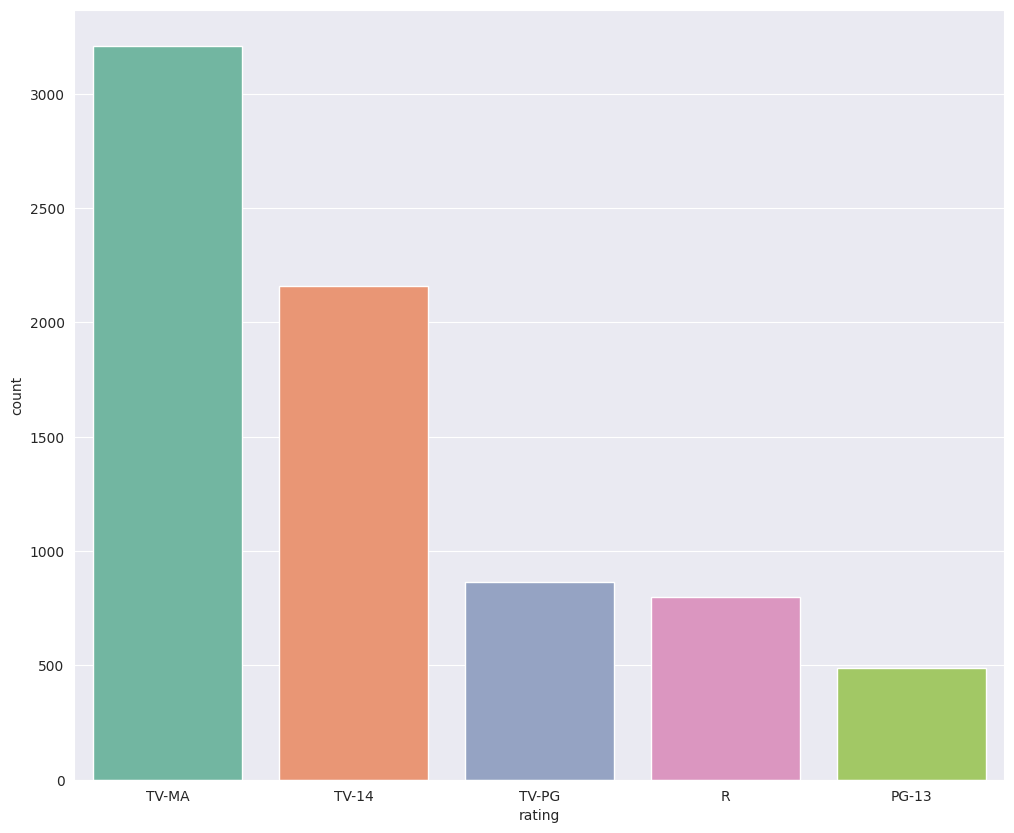

In [ ]:
plt.figure(figsize = (12,10))
sns.countplot(data = df, x = 'rating', order = df['rating'].value_counts().index[0:5], palette = 'Set2')

<Figure size 1200x600 with 0 Axes>

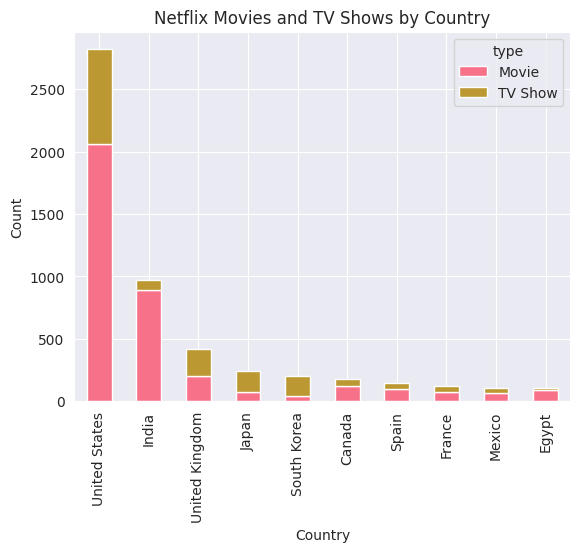

In [ ]:
# Group the data by country and type (TV show or Movie)
grouped_data = df.groupby(["country", "type"]).size().reset_index(name="count")

# Pivot the data to create a stacked bar chart
pivot_data = grouped_data.pivot(index="country", columns="type", values="count").fillna(0)
pivot_data["total"] = pivot_data["Movie"] + pivot_data["TV Show"]
pivot_data = pivot_data.sort_values("total", ascending=False).head(10)

# Create the stacked bar chart
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.set_palette("husl")
ax = pivot_data[["Movie", "TV Show"]].plot(kind="bar", stacked=True)
ax.set_xlabel("Country")
ax.set_ylabel("Count")
ax.set_title("Netflix Movies and TV Shows by Country")
plt.show()

## Linechart

In [ ]:
df_line = df[['show_id', 'type', 'release_year']]
df_line.head()

,show_id,type,release_year
0,s1,Movie,2020
1,s2,TV Show,2021
2,s3,TV Show,2021
3,s4,TV Show,2021
4,s5,TV Show,2021


In [ ]:
df_movie   = df_line[df_line.type == 'Movie']
df_tv_show = df_line[df_line.type == 'TV Show']

In [ ]:
df_movie_grouped = df_movie.groupby(['release_year'])[['show_id']].count().reset_index()
df_movie_grouped.columns = ['release_year', 'total_show']

df_tv_show_grouped = df_tv_show.groupby(['release_year'])[['show_id']].count().reset_index()
df_tv_show_grouped.columns = ['release_year', 'total_show']

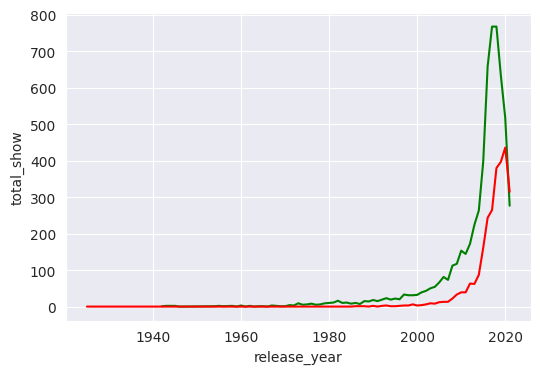

In [ ]:
plt.figure(figsize = (6,4))
sns.lineplot(x = 'release_year', y = 'total_show', data = df_movie_grouped, color = 'g')
sns.lineplot(x = 'release_year', y = 'total_show', data = df_tv_show_grouped, color = 'r')
plt.show()

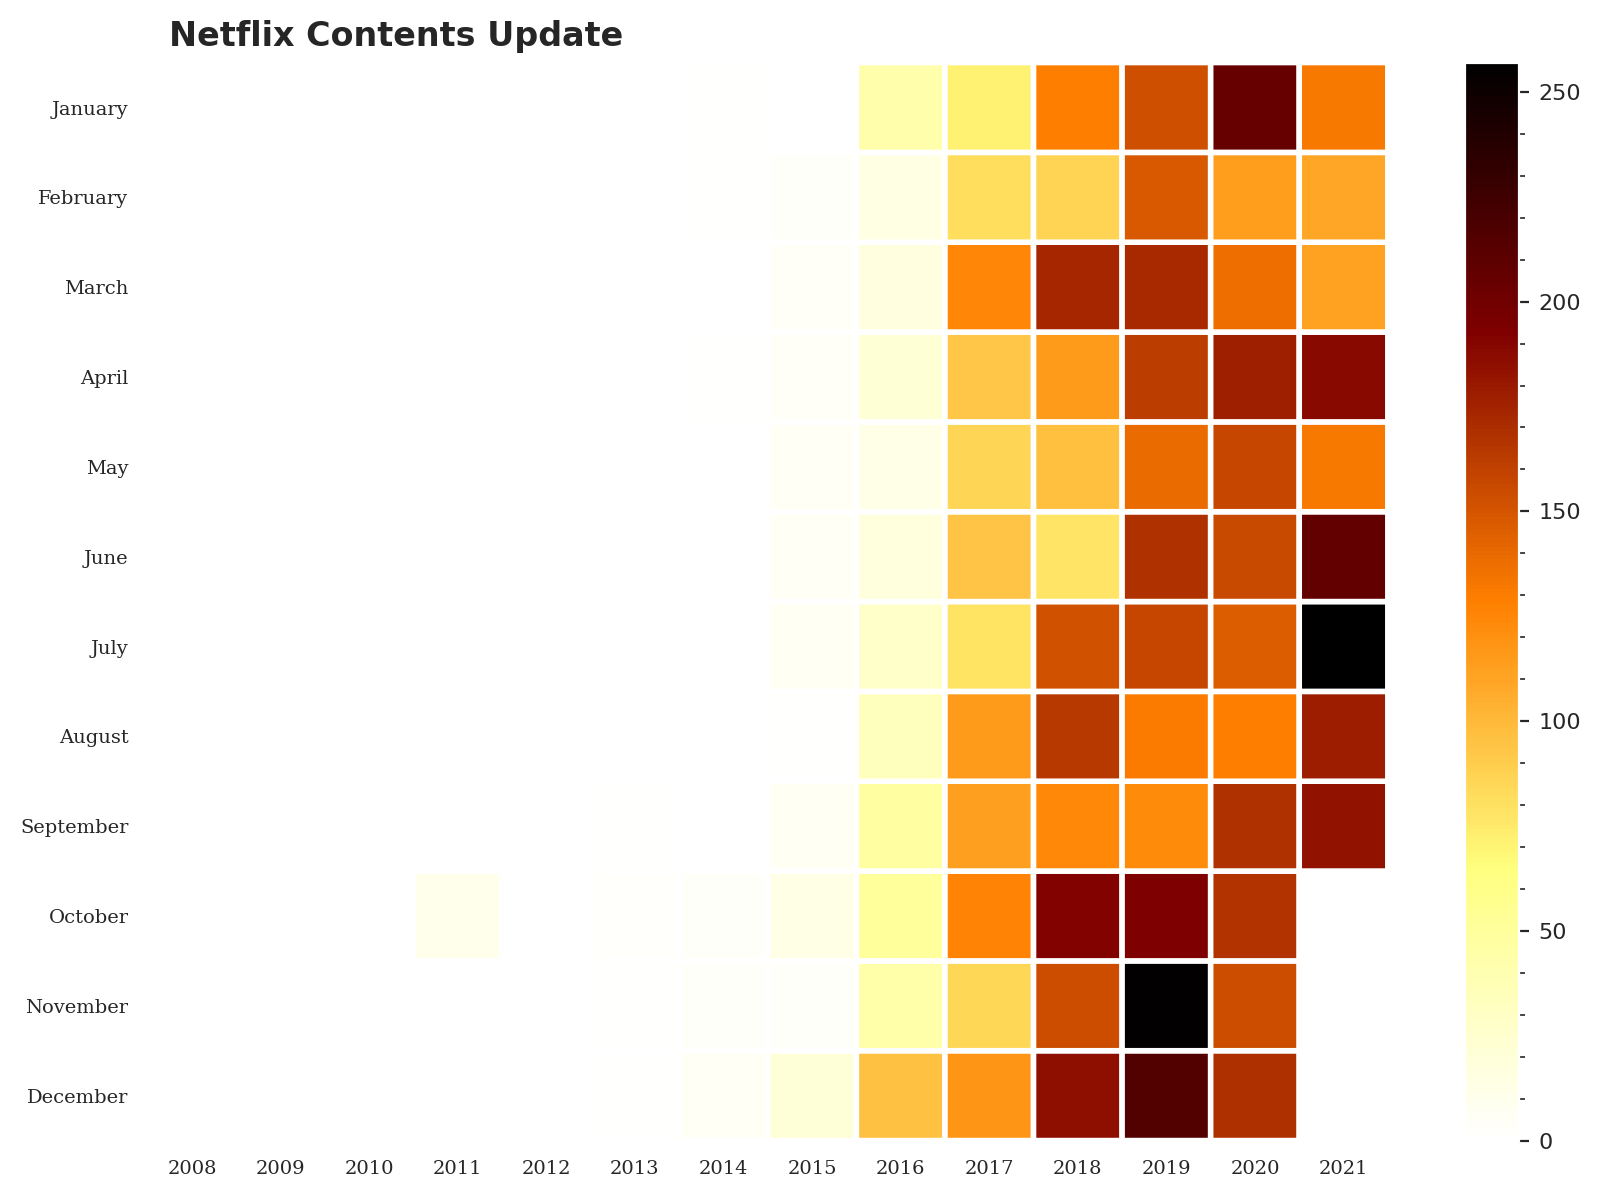

In [ ]:
netflix_date = df[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_grouped = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df_grouped, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df_grouped.columns), 1), df_grouped.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df_grouped.index), 1), df_grouped.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

# **2. Distribution**

## Histogram

In [ ]:
df[['duration']].head()

,duration
0,90 min
1,2 Seasons
2,1 Season
3,1 Season
4,2 Seasons


In [ ]:
df_movie_dist = df[df.type == 'Movie']
df_movie_dist.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
df_movie_dist = df_movie_dist.dropna(subset = ['duration'])

In [ ]:
df_movie_dist['duration'].isna().sum()

0

In [ ]:
df_movie_dist['duration'].head()

0      90 min
6      91 min
7     125 min
9     104 min
12    127 min
Name: duration, dtype: object

In [ ]:
df_movie_dist['duration'] = df_movie_dist['duration'].str.replace(" min", "")

In [ ]:
df_movie_dist['duration'] = df_movie_dist['duration'].astype(int)

In [ ]:
df_movie_dist['duration'].head()

0      90
6      91
7     125
9     104
12    127
Name: duration, dtype: int64

<Axes: xlabel='duration', ylabel='Count'>

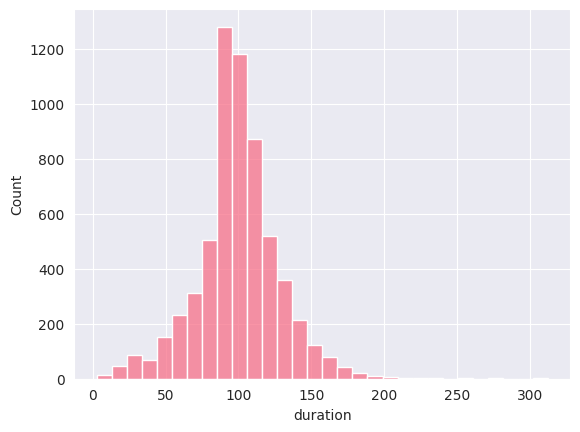

In [ ]:
sns.histplot(x = 'duration', data = df_movie_dist, bins = 30)

<Axes: xlabel='duration', ylabel='Density'>

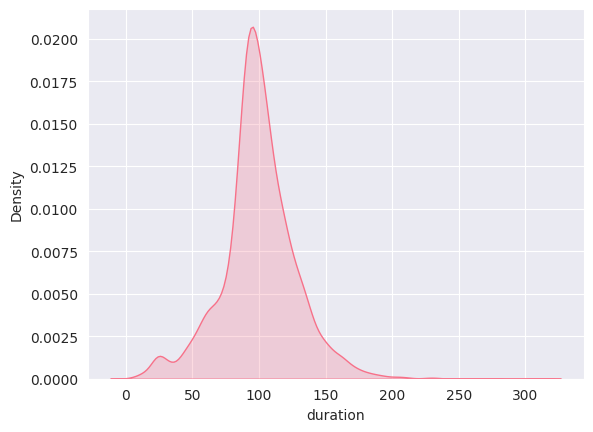

In [ ]:
sns.kdeplot(x = 'duration', data = df_movie_dist, shade = True)

## Boxplot

<Axes: ylabel='duration'>

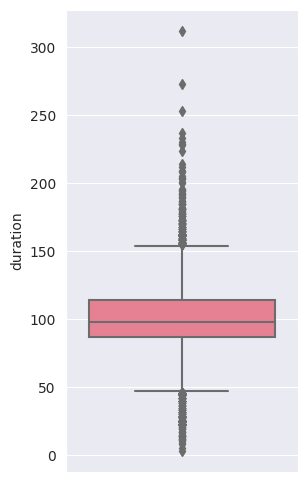

In [ ]:
plt.figure(figsize = (3, 6))
sns.boxplot(y = 'duration', data = df_movie_dist, orient = 'v')

In [ ]:
df_movie_dist[['release_year', 'duration']].head()

,release_year,duration
0,2020,90
6,2021,91
7,1993,125
9,2021,104
12,2021,127


In [ ]:
df_box_compare = df_movie_dist[['release_year', 'duration']]
df_box_compare.head()

,release_year,duration
0,2020,90
6,2021,91
7,1993,125
9,2021,104
12,2021,127


In [ ]:
movie_1990_2020 = df_box_compare[df_box_compare.release_year.isin([1990, 2000, 2010, 2020])]
movie_1990_2020.head()

,release_year,duration
0,2020,90
16,2020,67
27,2010,103
60,2010,85
78,2020,145


<Axes: xlabel='release_year', ylabel='duration'>

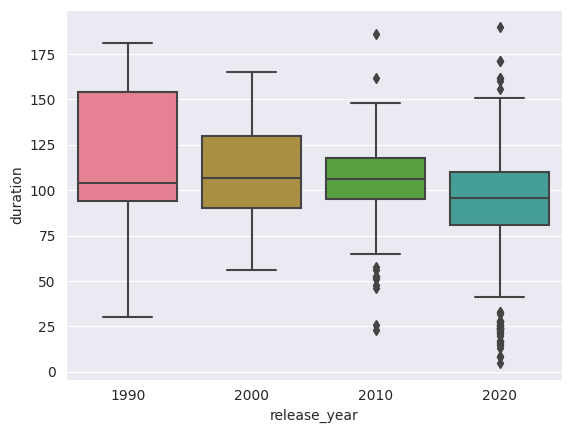

In [ ]:
sns.boxplot(y = 'duration', x = 'release_year', data = movie_1990_2020)

# **3. Relationship**

## Scatterplot

<Axes: xlabel='release_year', ylabel='duration'>

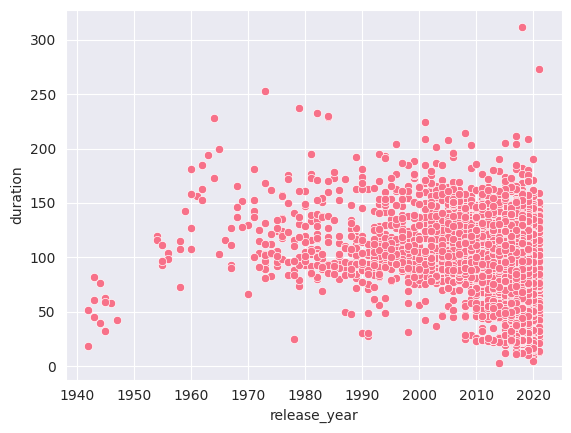

In [ ]:
sns.scatterplot(x = 'release_year', y = 'duration', data = df_movie_dist)

In [ ]:
df_movie_dist[['release_year', 'duration']].corr()

,release_year,duration
release_year,1.000000,-0.206285
duration,-0.206285,1.000000


In [ ]:
df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: xlabel='fixed acidity', ylabel='pH'>

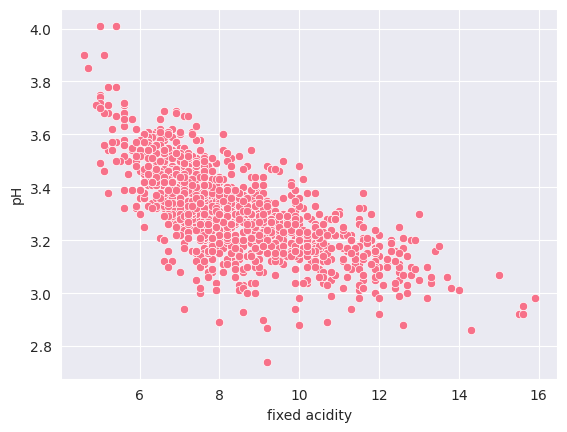

In [ ]:
sns.scatterplot(x = 'fixed acidity', y = 'pH', data = df_wine)

In [ ]:
df_wine[['fixed acidity', 'pH']].corr()

,fixed acidity,pH
fixed acidity,1.000000,-0.682978
pH,-0.682978,1.000000


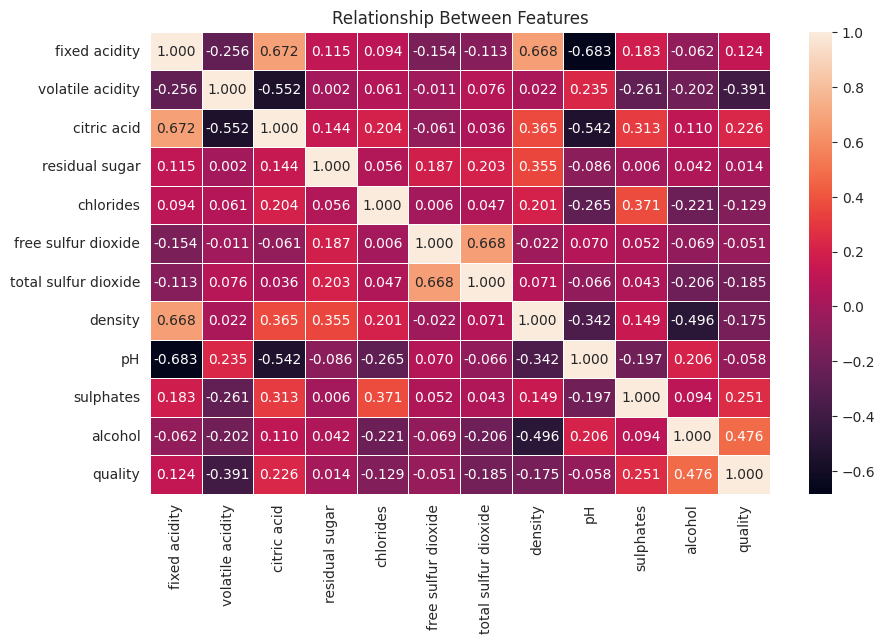

In [ ]:
plt.figure(figsize = (10, 6))
sns.heatmap(df_wine.corr(), annot = True, fmt = ".3f", linewidth = .7)
plt.title("Relationship Between Features")
plt.show()

# **4. Composition**

## Piechart

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


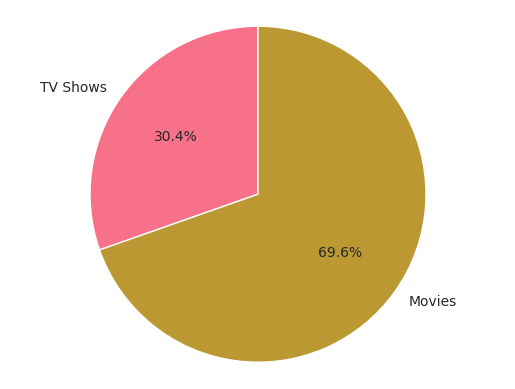

In [ ]:
# Count the number of TV shows and movies in the dataset
tv_shows_count = len(df[df['type'] == 'TV Show'])
movies_count = len(df[df['type'] == 'Movie'])

# Create a pie chart with the counts
labels = ['TV Shows', 'Movies']
sizes = [tv_shows_count, movies_count]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

# Show the pie chart
plt.show()

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


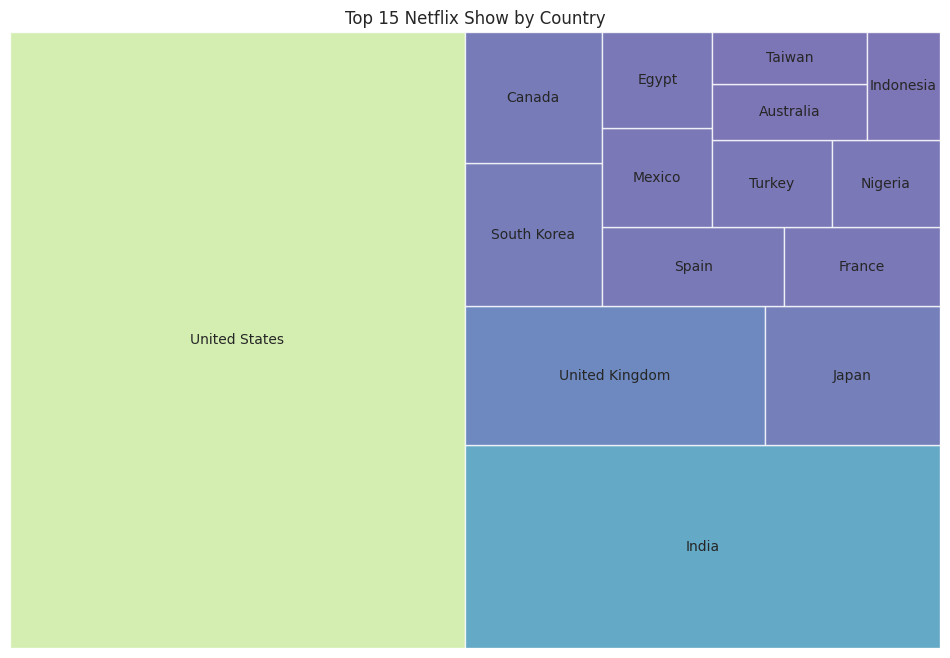

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Load the dataset into a pandas DataFrame
netflix_df = pd.read_csv('netflix_titles.csv')

# Group the DataFrame by country and count the number of titles
country_counts = netflix_df.groupby('country')['show_id'].count().reset_index()

# Sort the counts in descending order
country_counts = country_counts.sort_values(by='show_id', ascending=False)

# Normalize the counts to be between 0 and 1
country_counts['normalized_count'] = country_counts['show_id'] / country_counts['show_id'].sum()

# Only keep the top 15 countries based on their title count
top_countries = country_counts.head(15)

# Create a treemap with the normalized counts
labels = top_countries['country']
sizes = top_countries['normalized_count']
colors = plt.cm.Spectral_r(sizes)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, ax=ax)

# Add titles and axis labels
plt.title('Top 15 Netflix Show by Country')
plt.axis('off')

# Show the plot
plt.show()